In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib as plt
import IPython.display as disp

,Unnamed: 0,Group,X1,X2,X3,X4,X5,X6,X7,X8,...,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718
0,1,SADP,0.017901,0.009985,0.003740,0.012205,0.005254,0.023362,0.009241,-0.013089,...,0.014800,-0.000650,-0.007422,-0.003942,0.005397,0.000533,0.013678,-0.014425,0.000760,0.000889
1,2,SCZP,0.006281,0.014014,-0.005585,-0.000536,0.003254,0.008885,0.008263,-0.007209,...,-0.002154,0.007586,0.004824,0.008781,-0.007612,0.005459,0.004697,0.002705,0.008613,0.005739
2,3,BPP,-0.011590,0.009900,-0.008592,-0.009722,0.001935,0.016690,0.007919,-0.006034,...,-0.003193,-0.018124,0.012447,-0.000854,-0.003363,0.001340,-0.007613,0.001474,-0.003668,0.005865
3,4,SCZP,0.017341,0.009125,0.001433,0.005714,0.000891,0.004737,0.000913,-0.004097,...,-0.006566,0.018083,0.007969,0.005143,0.010550,0.000927,0.015112,0.003535,0.008583,0.006735
4,5,SADP,-0.025011,0.031992,-0.037631,-0.024702,-0.009084,-0.002958,0.031740,0.018152,...,-0.004469,0.037608,0.032018,0.005771,0.000471,0.017834,0.020844,0.039692,0.029756,0.003653


Text(0, 0.5, 'Group Count')

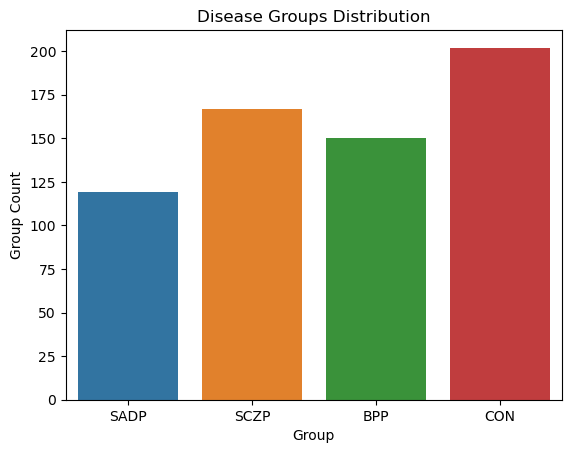

In [3]:
# Loading data

data = pd.read_csv('../../BSNIP_data/BSNIP_data/neural/neural_parcellated_gbc.csv')


disp.display(data.head())

# Evaluating data imbalance

ax = sns.countplot(data, x='Group')
ax.set_title('Disease Groups Distribution')
ax.set_ylabel('Group Count')

<Axes: xlabel='disease_status', ylabel='count'>

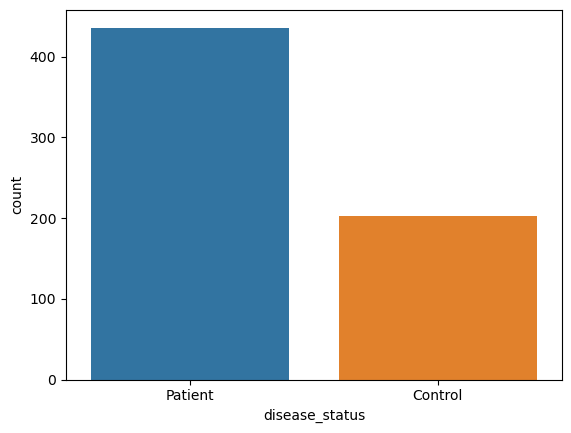

In [4]:
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')

sns.countplot(data, x='disease_status')

# Disease Status Classification (Binary Classification)

In [8]:
X = data.drop(['Group', 'disease_status'], axis=1)
y = data['disease_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001, solver='adam', verbose=0, random_state=21, tol=0.0001, activation='tanh')

print(f"Cross validation scores is: {cross_val_score(model, X_train, y_train, cv=5)}")

model.fit(X_train, y_train)
print(f"Test score: {model.score(X_test, y_test)}")

Cross validation score is: [0.97058824 0.97058824 0.83333333 1.         0.94117647]
Test score: 0.9921875


# Disease Classification (Multiclass classification)

In [43]:
# Hyperparameter tuning

X = data.drop(['Group', 'disease_status'], axis=1)
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(tol=0.000001, max_iter=500)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptative', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

search = GridSearchCV(model, params).fit(X_train, y_train)


disp.display(f"Best score achieved is: {search.best_score_}")
disp.display(search.best_params_)

/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joaquin/anaconda3/envs/ds_competition/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

'Best score achieved is: 0.603921568627451'

{'activation': 'relu',
 'alpha': 1e-10,
 'hidden_layer_sizes': 50,
 'learning_rate': 'invscaling',
 'solver': 'lbfgs'}

In [10]:
# Evaluating the best hyperparameters on test data

X = data.drop(['Group', 'disease_status'], axis=1)
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(tol=0.000001, max_iter=1000, activation='relu', alpha=10**(-10),  solver='lbfgs', learning_rate='invscaling', hidden_layer_sizes=(50))
model.fit(X_train, y_train)
print(f"The score on testing data is: {model.score(X_test, y_test)}")

The score on testing data is: 0.5625
